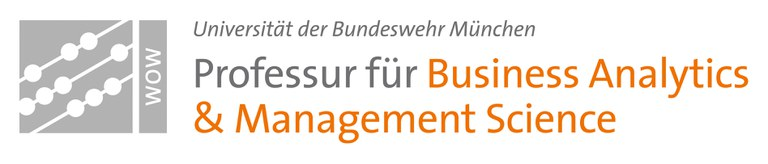

# FIFO-Algorithmus - Beispielinstanz Vorlesung
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall am 07.05.2022

#### Das vorliegene Notebook bezieht sich auf die Vorlesung Seite 31 im Fach Logistics Analytics.

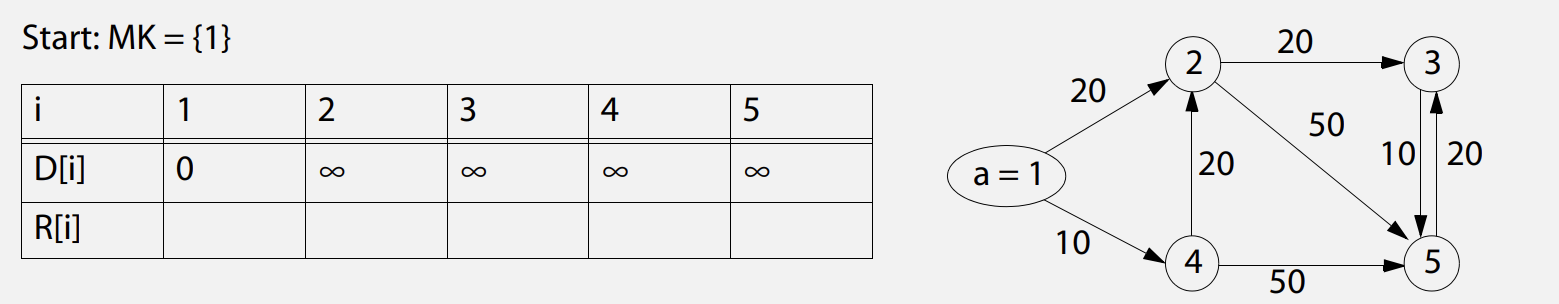

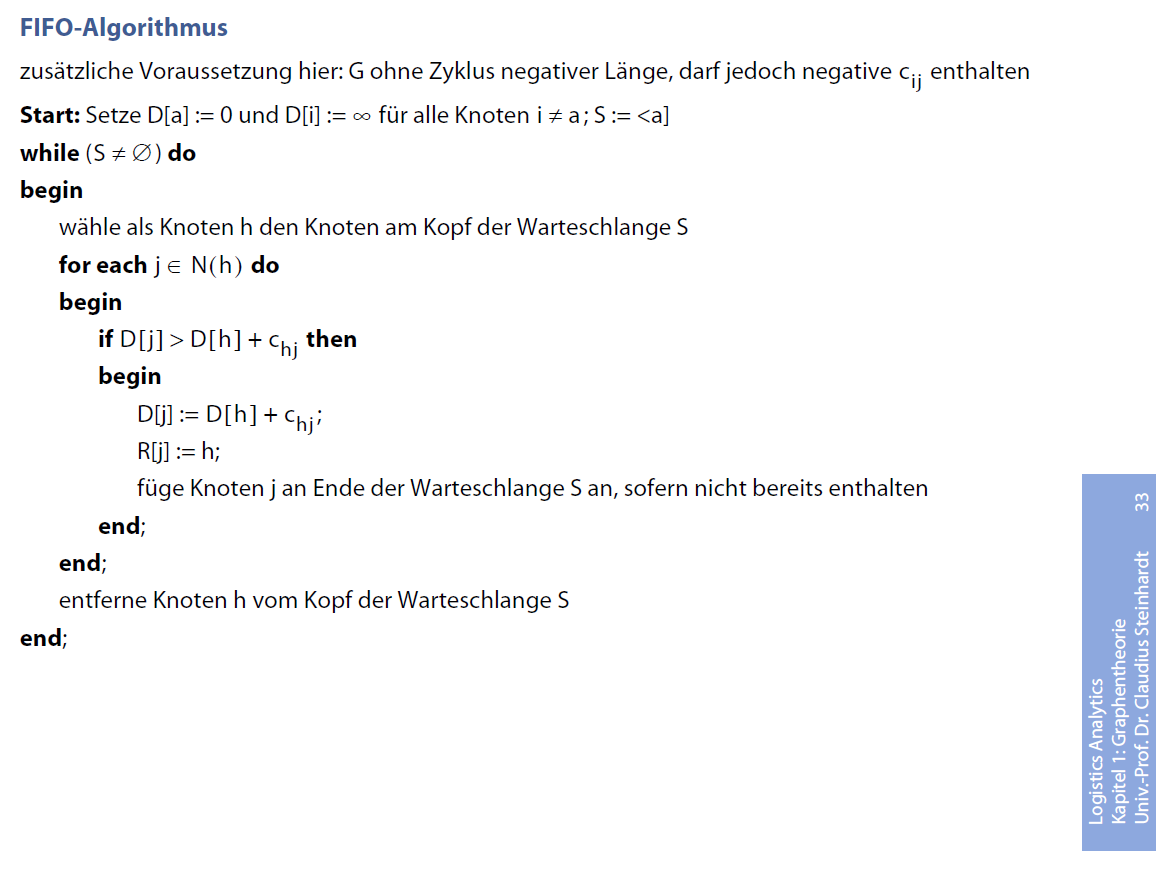

In [2]:
# Erstelle eine Menge mit allen verfügbaren Verbindungen
# und deren Entfernungen zueinander

# z.B: '1': {'2': 20, '4': 10} - Knoten '1' ist mit den Knoten '2' und '4' verbunden.
# Die jeweilige Entfernung  von '1' zu '2' ist 20 und von '1' zu '2' ist 10 usw.

entfernungen = {
    '1': {'2': 20, '4': 10},
    '2': {'3': 20, '5': 50},
    '3': {'5': 10},
    '4': {'2': 20, '5': 50},
    '5': {'3': 20}
    }

In [3]:
# Start:
# Setze D[a] := 0 und D[i] = ∞ für alle Knoten i ≠ a
D = {'1' : 0, '2' : float('inf'), '3' : float('inf'), '4' : float('inf'), '5' : float('inf'),}

# Setze S := <a]
S = ['1']

# Erstelle die Menge unmittelbarer Vorgänger
R = {}

In [4]:
# Zähle die Iterationen
iteration = 0

print("Start: ")
print("Elemente in Warteschlange : " + str(S))
print("\nAktuell kürzeste Entfernung von a nach i: ")
print("D[i] = ", (sorted(D.items())))
print("\nUnmittelbarer Vorgänger von i: ")
print("R[i] = ", (sorted(R.items())))


Start: 
Elemente in Warteschlange : ['1']

Aktuell kürzeste Entfernung von a nach i: 
D[i] =  [('1', 0), ('2', inf), ('3', inf), ('4', inf), ('5', inf)]

Unmittelbarer Vorgänger von i: 
R[i] =  []


In [5]:
# While (S ≠ ∅) do
while S:
    # begin
    # wähle als Knoten h den Knoten am Kopf der Warteschlange S
    h = S[0]
    # for each j ∈ N(h) do
    # begin
    for j in entfernungen[h].keys():
        # if D[j] > D[h] + chj then
        if D[j] >= D[h] + entfernungen[h][j]:
            # begin
            D[j] = D[h] + entfernungen[h][j]
            R[j] = h
            # füge Knoten j an Ende der Warteschlange S an, sofern nicht bereits enthalten
            if j not in S:
                S.append(j)
        # end
    # end
    # Entferne Knoten h vom Kopf der Warteschlange S
    S.pop(0)
    
    # Nächste Iteration
    iteration += 1
    
    # gib jede Iteration aus:
    print("\n\n------------")
    if S:
        print("h = " + str(h) + "; Iteration " + str(iteration) + " ergibt: ")
        print("\nElemente in Warteschlange : ", S)
        print("\nAktuell kürzeste Entfernung von a nach i: ")
        print("D[i] = ", (sorted(D.items())))
        print("\nUnmittelbarer Vorgänger von i: ")
        print("R[i] = ", (sorted(R.items())))
    else:
        print("Iteration " + str(iteration) +" ergibt:")
        print("\nWarteschlange leer -> Abbruch")
        print("\nKürzeste Entfernung von a nach i: ")
        print("D[i] = ", (sorted(D.items())))
        print("\nUnmittelbarer Vorgänger von i: ")
        print("R[i] = ", (sorted(R.items())))



------------
h = 1; Iteration 1 ergibt: 

Elemente in Warteschlange :  ['2', '4']

Aktuell kürzeste Entfernung von a nach i: 
D[i] =  [('1', 0), ('2', 20), ('3', inf), ('4', 10), ('5', inf)]

Unmittelbarer Vorgänger von i: 
R[i] =  [('2', '1'), ('4', '1')]


------------
h = 2; Iteration 2 ergibt: 

Elemente in Warteschlange :  ['4', '3', '5']

Aktuell kürzeste Entfernung von a nach i: 
D[i] =  [('1', 0), ('2', 20), ('3', 40), ('4', 10), ('5', 70)]

Unmittelbarer Vorgänger von i: 
R[i] =  [('2', '1'), ('3', '2'), ('4', '1'), ('5', '2')]


------------
h = 4; Iteration 3 ergibt: 

Elemente in Warteschlange :  ['3', '5']

Aktuell kürzeste Entfernung von a nach i: 
D[i] =  [('1', 0), ('2', 20), ('3', 40), ('4', 10), ('5', 60)]

Unmittelbarer Vorgänger von i: 
R[i] =  [('2', '1'), ('3', '2'), ('4', '1'), ('5', '4')]


------------
h = 3; Iteration 4 ergibt: 

Elemente in Warteschlange :  ['5']

Aktuell kürzeste Entfernung von a nach i: 
D[i] =  [('1', 0), ('2', 20), ('3', 40), ('4', 10),